450. Delete Node in a BST

Given a root node reference of a BST and a key, delete the node with the given key in the BST. Return the root node reference (possibly updated) of the BST.

Basically, the deletion can be divided into two stages:

Search for a node to remove.
If the node is found, delete the node.

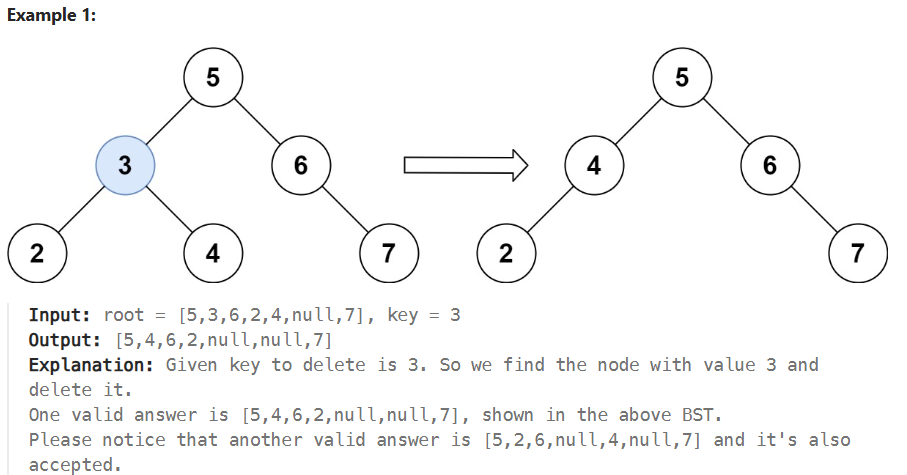

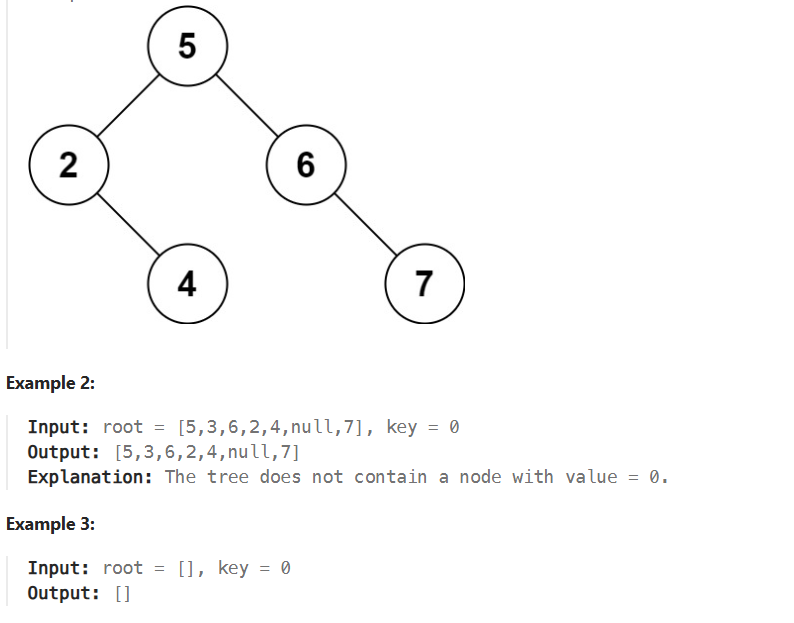

In [ ]:
 

class Solution(object):
    def find_min_in_BST(self, tree):
        if not tree:
            return None
    
        if not tree.left:
            return tree.val
    
        return find_min_in_BST(tree.left) 
    
    def deleteNode(self, tree, key):
        if not tree:
            return None

        if key < tree.val:
            tree.left = self.deleteNode(tree.left, key)

        elif key > tree.val:
            tree.right = self.deleteNode(tree.right, key)

        elif  key == tree.val:
            if not tree.left and not tree.right:
                return None

            if not tree.left:
                return tree.right

            if not tree.right:
                return tree.left

            # if we have both subtrees
            if tree.left and tree.right:
                min_val_in_right_subtree = self.find_min_in_BST(tree.right)
                tree.val = min_val_in_right_subtree
        
                # delete doubler in right subtree
                tree.right = self.deleteNode(tree.right, min_val_in_right_subtree)
                return tree

        return tree

In [ ]:
# Development

In [7]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [70]:
root = [5,3,6,2,4,"null",7]
# root = [5,3,6,12,4,"null",7] # check not BST
key = 3

In [71]:
# Helper function to build tree by layers
from collections import deque

def tree_builder_traversal_by_levels(l):
    if len(l) == 0:
        return None

    tree = TreeNode(l[0])
    q = deque()
    q.append(tree)
    i = 1

    while q:
        node = q.popleft()
        if i < len(l):
            if l[i] != "null":
                node.left = TreeNode(l[i])
                q.append(node.left)

        i+=1
        if i < len(l):
            if l[i] != "null":
                node.right = TreeNode(l[i])
                q.append(node.right)

        i+=1

    return tree

      
tree = tree_builder_traversal_by_levels(root)

In [72]:
# Helper function. Check if tree is BST
import math

def isBST(tree, left_lim = -math.inf, right_lim = math.inf):
    if not tree:
        return True

    l_result = isBST(tree.left, left_lim, tree.val)
    if not l_result:
        return False

    r_result = isBST(tree.right, tree.val, right_lim)
    if not r_result:
        return False

    return left_lim < tree.val < right_lim and l_result and r_result

isBST(tree)
    

True

In [73]:
# Help function. Find min in BST
def find_min_in_BST(tree):
    if not tree:
        return None

    if not tree.left:
        return tree.val

    return find_min_in_BST(tree.left)     

find_min_in_BST(tree)

2

In [74]:
# Help function. Make list representation of the tree by levels

def list_traversal_by_levels(tree):
    if not tree:
        return []

    res_list = []
    q = deque()
    q.append(tree)
    res_list.append(tree.val)

    while q:
        node = q.popleft()

        if node.left:
            res_list.append(node.left.val)
            q.append(node.left)
        else:
            res_list.append("null")
        

        if node.right:
            res_list.append(node.right.val)
            q.append(node.right)
        else:
            res_list.append("null")

    while res_list[-1] == "null":
        res_list.pop()
    return res_list
    

In [96]:
def delete_key_from_BST(tree, key):
    if not tree:
        return None

    if key < tree.val:
        tree.left = delete_key_from_BST(tree.left, key)

    elif key > tree.val:
        tree.right = delete_key_from_BST(tree.right, key)

    elif  key == tree.val:
        if not tree.left and not tree.right:
            return None

        if not tree.left:
            return tree.right

        if not tree.right:
            return tree.left

        # if we have both subtrees
        if tree.left and tree.right:
            min_val_in_right_subtree = find_min_in_BST(tree.right)
            tree.val = min_val_in_right_subtree
    
            # delete doubler in right subtree
            tree.right = delete_key_from_BST(tree.right, min_val_in_right_subtree)
            return tree

    return tree

        

In [107]:
# show list representation of origin tree
list_traversal_by_levels(tree)

[5, 3, 6, 2, 4, 'null', 7]

In [112]:
# remove key
tree = delete_key_from_BST(tree, key)

In [113]:
# show list representation of result tree
list_traversal_by_levels(tree)

[5, 4, 6, 2, 'null', 'null', 7]